In [353]:
import pandas as pd

In [354]:
raw_data = pd.read_excel('final_analysis_data.xlsx')
final_data = pd.read_excel('28-Night-FINAL_DATASET.xlsx')

In [355]:
final_data.shape

(29034, 51)

In [218]:
final_data.columns

Index(['hhid', 'region', 'regurb', 'subreg', 'district', 'urban', 'weight',
       'PID', 's4q07', 'h2q3', 'age', 'h2q10', 's8q03', 's8q04', 's8q06',
       's8q08', 's8q10', 's8q12', 's8q19a', 'occ', 'h8q19b_twoDigit', 's8q20a',
       'h8q20b_oneDigit', 's8q36a', 's8q36b', 's8q36c', 's8q36d', 's8q36e',
       's8q69', 's8q77', 's8q31a', 's8q31c', 's8q78', 'CEA01', 'CEA01A',
       'CEA01B', 'CEA01C', 'CEA01D', 'education_levels', 'married',
       'total_hours', 'hourly_wage', 'monthly_wage', 'lw', 'permanent', 'age2',
       'numchild', 'gender', 'sec_cat', 'employed', 'lmw'],
      dtype='object')

In [356]:
final_employtics = final_data[['hhid', 'PID', 'h2q3', 'age', 'h2q10', 's8q04', 's8q06', 's8q08', 's8q10', 's8q12',
                               'education_levels', 'total_hours', 'hourly_wage', 'monthly_wage', 'numchild', 'gender','lw',
                               'sec_cat', 'h8q19b_twoDigit', 'lmw', 'weight']]
final_employtics = final_employtics.rename(columns={'h2q3': 'sex', 
                                                    'h2q10': 'marital_status', 
                                                    's8q04': 'waged_worker', 
                                                    's8q06': 'business_owner', 
                                                    's8q08': 'unpaid_hh_worker', 
                                                    's8q10': 'apprentice', 
                                                    's8q12': 'hh_farm_worker',
                                                    'h8q19b_twoDigit': 'ISCO'})

In [394]:
raw_data['wgt'].sum()

37232135.169391066

### Remove unemployed people / Retain employed people only

In [365]:
def employ_status(row):
    if row['waged_worker'] ==1 or  row['business_owner'] == 1 or row['apprentice']==1 or row['unpaid_hh_worker']==1:
        return 1
    else:
        return 0

In [366]:
final_employtics['employed'] = final_employtics.apply(lambda row: employ_status(row), axis=1)
final_employtics.shape

(29034, 22)

In [367]:
employed_pips = final_employtics[final_employtics['employed']== 1].copy()
employed_pips['unique_person_id'] = employed_pips['hhid'].astype(str) + '_' + employed_pips['PID'].astype(str)
employed_pips.shape

(5940, 23)

In [368]:
employed_pips.head(2)

,hhid,PID,sex,age,marital_status,waged_worker,business_owner,unpaid_hh_worker,apprentice,hh_farm_worker,...,monthly_wage,numchild,gender,lw,sec_cat,ISCO,lmw,weight,employed,unique_person_id
2,0007d1f1449242feb5a25429644fb991,2.0,2.0,24.0,5.0,1.0,2.0,2.0,2.0,1.0,...,NaN,2.0,1.0,NaN,4.0,23.0,NaN,2621.863747,1,0007d1f1449242feb5a25429644fb991_2.0
3,0007d1f1449242feb5a25429644fb991,2.0,2.0,24.0,5.0,1.0,2.0,2.0,2.0,1.0,...,NaN,7.0,1.0,NaN,4.0,23.0,NaN,2621.863747,1,0007d1f1449242feb5a25429644fb991_2.0


## Group by Age

In [369]:
bins= [0,15,25,35,45,55,65, 120]
labels = ['Group_1-14','Group_15-24','Group_25-34','Group_35-44','Group_45-54', 'Group_55-64', 'Group_65-119']
employed_pips['Age_Grouping'] = pd.cut(employed_pips['age'], bins=bins, labels=labels, right=False)
employed_pips.head(2)

,hhid,PID,sex,age,marital_status,waged_worker,business_owner,unpaid_hh_worker,apprentice,hh_farm_worker,...,numchild,gender,lw,sec_cat,ISCO,lmw,weight,employed,unique_person_id,Age_Grouping
2,0007d1f1449242feb5a25429644fb991,2.0,2.0,24.0,5.0,1.0,2.0,2.0,2.0,1.0,...,2.0,1.0,NaN,4.0,23.0,NaN,2621.863747,1,0007d1f1449242feb5a25429644fb991_2.0,Group_15-24
3,0007d1f1449242feb5a25429644fb991,2.0,2.0,24.0,5.0,1.0,2.0,2.0,2.0,1.0,...,7.0,1.0,NaN,4.0,23.0,NaN,2621.863747,1,0007d1f1449242feb5a25429644fb991_2.0,Group_15-24


In [370]:
gender_parting = employed_pips[['unique_person_id', 'age', 'sex', 'Age_Grouping']].copy()

In [371]:
gender_parting.head(2)

,unique_person_id,age,sex,Age_Grouping
2,0007d1f1449242feb5a25429644fb991_2.0,24.0,2.0,Group_15-24
3,0007d1f1449242feb5a25429644fb991_2.0,24.0,2.0,Group_15-24


In [372]:
gender_parting_age = gender_parting.groupby(['Age_Grouping','sex']).count()[['unique_person_id']]
gender_parting_age.to_excel('gender_parting.xlsx')

In [373]:
age_gender_parting = pd.read_excel('age_gender_parting.xlsx')

In [374]:
age_gender_parting['men_percentage'] = age_gender_parting['Men']/(age_gender_parting['Men'] + age_gender_parting['Women'])
age_gender_parting['women_percentage'] = age_gender_parting['Women']/(age_gender_parting['Men'] + age_gender_parting['Women'])
age_gender_parting = age_gender_parting[age_gender_parting['Age_group']!='Group_1-14']
age_gender_parting

,Age_group,Men,Women,men_percentage,women_percentage
1,Group_15-24,804,436,0.648387,0.351613
2,Group_25-34,962,662,0.592365,0.407635
3,Group_35-44,698,616,0.531202,0.468798
4,Group_45-54,548,398,0.579281,0.420719
5,Group_55-64,260,196,0.570175,0.429825
6,Group_65-119,139,110,0.558233,0.441767


In [375]:
# import matplotlib.pyplot as plt
# fig,ax = plt.subplots()
# ax.plot(age_gender_parting['Age_group'], age_gender_parting['men_percentage'])
# plt.show()

<AxesSubplot:xlabel='Age_group'>

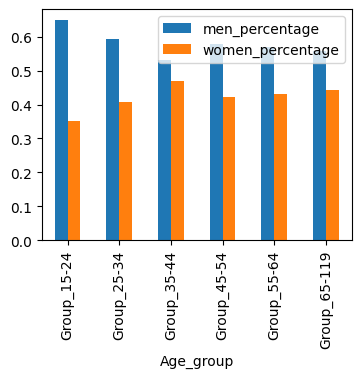

In [377]:
age_gender_parting.plot(x="Age_group", y=["men_percentage", "women_percentage"], kind="bar", figsize=(4, 3))

### Sector split

In [378]:
ISCO_parting = employed_pips[['unique_person_id', 'sex', 'ISCO']].copy()

In [379]:
ISCO_parting.shape

(5940, 3)

In [338]:
ISCO_parting = ISCO_parting.groupby(['ISCO', 'sex']).count()

### Education levels

In [380]:
# education, sex, hourly rate
gender_educ_wage = employed_pips[['unique_person_id', 'education_levels','sex', 'hourly_wage', 'monthly_wage', 'lw', 'lmw', 'weight']]

In [381]:
gender_educ_wage.shape

(5940, 8)

In [476]:
hourwage_gender = gender_educ_wage[gender_educ_wage['hourly_wage'].notna()]

In [484]:
hourwage_gender = hourwage_gender[hourwage_gender['hourly_wage']!=0].copy()

In [485]:
def weighted_average(dataframe, value, weight):
    val = dataframe[value]
    wt = dataframe[weight]
    return (val * wt).sum() / wt.sum()

In [486]:
hourwage_gender.head()

,unique_person_id,education_levels,sex,hourly_wage,monthly_wage,lw,lmw,weight,weighted_wage
26,003ed8d32f794609919d60d2ed8813e8_1.0,NaN,2.0,700.0,56000.0,6.551080,10.933107,888.204770,6.217433e+05
27,003ed8d32f794609919d60d2ed8813e8_1.0,NaN,2.0,700.0,56000.0,6.551080,10.933107,888.204770,6.217433e+05
32,003ed8d32f794609919d60d2ed8813e8_4.0,NaN,1.0,700.0,56000.0,6.551080,10.933107,888.204770,6.217433e+05
33,003ed8d32f794609919d60d2ed8813e8_4.0,NaN,1.0,700.0,56000.0,6.551080,10.933107,888.204770,6.217433e+05
116,0142f6f0c8f9435c97ac2563a6f390ec_1.0,1.0,1.0,37500.0,6000000.0,10.532096,15.607270,3036.227677,1.138585e+08


In [487]:
hourwage_gender['weighted_wage'] = hourwage_gender['hourly_wage']*hourwage_gender['weight']

In [488]:
hourwage_gender['log_hour_weighted'] = np.log10(hourwage_gender['weighted_wage'])

In [491]:
hwg_2 = hourwage_gender.groupby(['education_levels', 'sex'])['log_hour_weighted'].mean()
hwg_2

education_levels  sex
1.0               1.0    6.994125
                  2.0    6.877685
2.0               1.0    7.125642
                  2.0    7.213433
3.0               1.0    7.827704
                  2.0    6.863753
4.0               1.0    7.777142
                  2.0    8.075357
Name: log_hour_weighted, dtype: float64

In [404]:
# gender_educ_hwage = gender_educ_hwage_.groupby(['education_levels', 'sex'])['lw'].mean()
# gender_educ_hwage


In [497]:
hwg = hourwage_gender.groupby(['education_levels', 'sex']).apply(weighted_average,
                                     'lw', 'weight')

In [441]:
hwg_ = pd.DataFrame(hwg).reset_index()
hwg_ = hwg_.rename(columns={0: 'weighted_hourly_log'})
hwg_ = hwg_.pivot(index='education_levels', columns='sex', values='weighted_hourly_log')
h = pd.DataFrame(hwg_.reset_index())

In [444]:
h=h.rename(columns={1.0: 'Men_hourly', 2.0: 'Women_hourly'})
h['gender_diff'] = (h['Women_hourly'] - h['Men_hourly'])*100

In [445]:
h

sex,education_levels,Men_hourly,Women_hourly,gender_diff
0,1.0,8.237790,8.194454,-4.333581
1,2.0,8.982848,9.443338,46.049072
2,3.0,9.397793,8.875644,-52.214847
3,4.0,9.785705,9.656628,-12.907696


In [385]:
gender_educ_hwage_.shape

(518, 9)

In [313]:
gender_educ_mwage_ = gender_educ_wage[gender_educ_wage['monthly_wage'].notna()].copy()
gender_educ_mwage = gender_educ_mwage_.groupby(['education_levels', 'sex'])['lmw'].mean()
m = pd.DataFrame(gender_educ_mwage.round(5))
m.reset_index()

,education_levels,sex,lmw
0,1.0,1.0,13.17960
1,1.0,2.0,12.56581
2,2.0,1.0,13.80264
3,2.0,2.0,13.48705
4,3.0,1.0,14.57416
5,3.0,2.0,13.91297
6,4.0,1.0,14.97866
7,4.0,2.0,14.50866


In [391]:
gender_ed = pd.read_excel('gender_hourly.xlsx', index_col=[0])
gender_ed.head()

,education_levels,sex,weighted_log
0,1,1,0.005853
1,1,2,0.005979
2,2,1,0.007201
3,2,2,0.004883
4,3,1,0.004884


In [189]:
gender_educ_mwage_.shape

(536, 6)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

d = {'Age': [23, 43, 32, 51, 29], 
     'Sex': ['m', 'm', 'f', 'f', 'm'],
     'disease': [0, 1, 0, 1, 1]}
df = pd.DataFrame(data=d)

df_pivot = pd.pivot_table(
    df,
    index="Sex",
    columns="disease",
    values="disease",
    aggfunc='count')

fig, ax = plt.subplots()
df_pivot.plot(kind="bar", ax=ax)
ax.legend(["Normal", "Heart Disease"]);
ax.tick_params(axis='x', rotation=0)
ax.set_ylabel("count")

<AxesSubplot:>

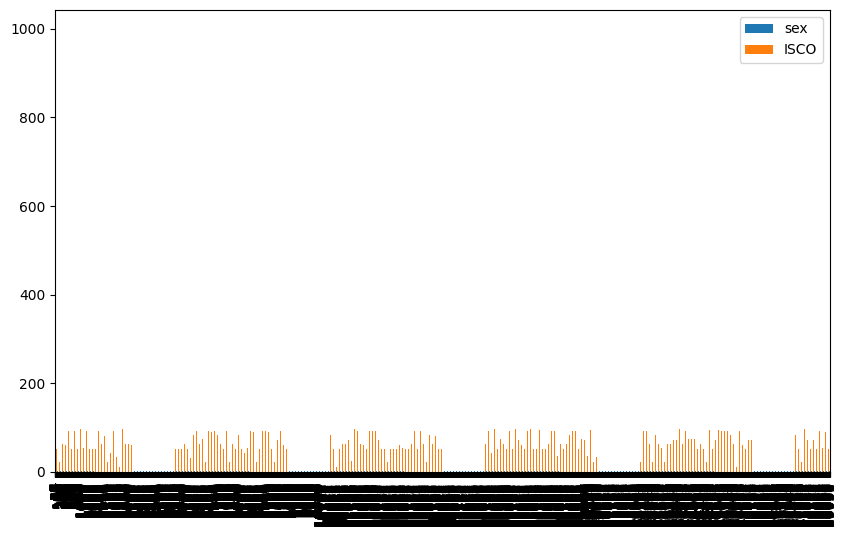

In [141]:
ISCO_parting.plot(kind='bar', figsize=(10, 6))

In [5]:
trans_data = raw_data.copy(deep=True)
trans_data = trans_data.rename(columns={'s8q36a': 'Mon_hrs', 's8q36b': 'Tue_hrs',
                                        's8q36c': 'Wed_hrs', 's8q36d': 'Thu_hrs', 
                                        's8q36e': 'Fri_hrs', 's8q77': 'payment_method',
                                       's8q31a': 'payment', 's8q31c': 'payment_periodicity',
                                       's8q78': 'last_month_payment'})

In [6]:
payment_data = trans_data[['hhid', 'PID', 'Mon_hrs', 'Tue_hrs', 'Wed_hrs', 'Thu_hrs', 'Fri_hrs', 'payment_method', 'payment_periodicity','payment','last_month_payment']].copy()

In [7]:
week_hrs = ['Mon_hrs', 'Tue_hrs', 'Wed_hrs' , 'Thu_hrs', 'Fri_hrs']
payment_data['weekly_hours'] = payment_data[week_hrs].sum(axis=1)

In [10]:
scale_mapper = {1:'hourly', 2:'daily', 3: 'weekly', 4: 'monthly'}
payment_data["payment_periodicity"] = payment_data["payment_periodicity"].replace(scale_mapper)

In [11]:
pay_method ={1 : 'set rate', 2: 'both set rate and commission',3:'commission on the basis of sales', 4:'in kind only',
             96:'some other way'}
payment_data["payment_method"] = payment_data["payment_method"].replace(pay_method)

In [12]:
monthly_earners = payment_data[payment_data['payment_periodicity']=='weekly']

In [13]:
employment_xtics = raw_data[['hhid', 'PID' ,'h2q8', 'h2q3']].copy(deep=True)
employment_xtics['unique_person_id'] = employment_xtics['hhid'].astype(str) + '_' + employment_xtics['PID'].astype(str)
employment_xtics = employment_xtics.rename(columns={'h2q8':'Age', 'h2q3': 'Sex'})

In [14]:
employment_xtics = employment_xtics.dropna(subset=['PID']).copy()

In [15]:
bins= [0,15,25,35,45,55,65, 120]
labels = ['Group_1-14','Group_15-24','Group_25-34','Group_35-44','Group_45-54', 'Group_55-64', 'Group_65-119']
employment_xtics['Age_Grouping'] = pd.cut(employment_xtics['Age'], bins=bins, labels=labels, right=False)
employment_xtics.head(2)

,hhid,PID,Age,Sex,unique_person_id,Age_Grouping
0,0007d1f1449242feb5a25429644fb991,1.0,51.0,2.0,0007d1f1449242feb5a25429644fb991_1.0,Group_45-54
1,0007d1f1449242feb5a25429644fb991,2.0,24.0,2.0,0007d1f1449242feb5a25429644fb991_2.0,Group_15-24


In [16]:
employment_xtics['Age_Grouping'] = employment_xtics['Age_Grouping'].cat.add_categories('outlier').fillna('outlier')

In [17]:
# Remove nans
outliers = employment_xtics[ employment_xtics['Age_Grouping'] == 'outlier']
outliers

,hhid,PID,Age,Sex,unique_person_id,Age_Grouping


In [18]:
employment_xtics['age_grouping'] = employment_xtics.groupby('Age_Grouping')['Age'].transform('count')

In [19]:
employment_xtics.groupby(['Age_Grouping']).count()

,hhid,PID,Age,Sex,unique_person_id,age_grouping
Age_Grouping,,,,,,
Group_1-14,5762,5762,5762,5762,5762,5762
Group_15-24,3300,3300,3300,3300,3300,3300
Group_25-34,1681,1681,1681,1681,1681,1681
Group_35-44,1287,1287,1287,1287,1287,1287
Group_45-54,1038,1038,1038,1038,1038,1038
Group_55-64,704,704,704,704,704,704
Group_65-119,722,722,722,722,722,722
outlier,0,0,0,0,0,0


In [21]:
employment_xtics['Age'].describe()

count    14494.000000
mean        24.652615
std         19.120920
min          3.000000
25%         10.000000
50%         18.000000
75%         36.000000
max        103.000000
Name: Age, dtype: float64

In [22]:
employment_xtics_legal = employment_xtics[employment_xtics['Age'] >= 15]

In [23]:
employment_xtics_legal.groupby(['Age_Grouping']).count()

,hhid,PID,Age,Sex,unique_person_id,age_grouping
Age_Grouping,,,,,,
Group_1-14,0,0,0,0,0,0
Group_15-24,3300,3300,3300,3300,3300,3300
Group_25-34,1681,1681,1681,1681,1681,1681
Group_35-44,1287,1287,1287,1287,1287,1287
Group_45-54,1038,1038,1038,1038,1038,1038
Group_55-64,704,704,704,704,704,704
Group_65-119,722,722,722,722,722,722
outlier,0,0,0,0,0,0
